<ul>
    <li><h3>Import libraries</h3></li>
</ul>

In [1]:
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher 
from spacy.tokens import Span

lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

import PyPDF2 

In [3]:
#nltk.download('vader_lexicon')

<ul>
    <li><h3>Load data</h3></li>
</ul>

In [4]:
# creating a pdf file object 
pdfFileObj = open('/home/anandhuh/Downloads/budget_speech.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
print(pdfReader.numPages) 

38


In [5]:
text = ''

for page in range(4,33):
    
    # creating a page object 
    pageObj = pdfReader.getPage(page) 
    
    # extracting text from page 
    text += pageObj.extractText()
    
# closing the pdf file object 
pdfFileObj.close() 

In [6]:
# extracted text smaple
text[:1000]

'  Budget 202\n2-202\n3  Speech of\n Nirmala Sitharaman\n Minister of Finance\n Febru\nary 1, 202\n2 Hon™ble Speaker, \n I present the\n Budget for the year 202\n2-23.   Introduction\n 1.\n At the outset, I want to take a moment to express my empathy for \nthose who had to bear adverse health and economic effects of the \npandemic. \n 2.\n The overall, sharp rebound and recovery of the economy\n is reflective \nof our country™s strong resilience. India™s ec\nonomic growth in the current \nyear is estimated to be 9.2 per cent, highest among all large economies. \n 3.\n I recognise we are in the midst of an Omicron wave, with high \nincidence, but milder symptoms. Further, the speed and coverage of our \nvaccination campaign\n has helped greatly. With the accelerated \nimprovement of health infrastructure in the past two years, we are in a \n\nstrong position to withstand challenges.  I am confident that with \nSabka \nPrayas \nwe will continue our journey of strong growth.\n 4.\n Hon™bl

<ul>
    <li><h3>Basic text cleaning</h3></li>
</ul>

In [7]:
def clean(text):
    
    # remove new lines & lower casing
    text=text.replace('\n','').lower()
    
    # remove numbered list (eg 1. 2. 11. etc)
    text = re.sub('\s+[0-9]{1,2}\.','', text)
    
    # remove all non ascii characters
    text = re.sub('[^\x00-\x7f]','', text)
       
    # remove extra spaces
    text=re.sub("\s\s+", " ", text)
    
    return text

In [8]:
# apply function
text=clean(text)

# cleaned text sample
text[:1000]

' budget 2022-2023 speech of nirmala sitharaman minister of finance february 1, 2022 honble speaker, i present the budget for the year 2022-23. introduction at the outset, i want to take a moment to express my empathy for those who had to bear adverse health and economic effects of the pandemic. the overall, sharp rebound and recovery of the economy is reflective of our countrys strong resilience. indias economic growth in the current year is estimated to be2 per cent, highest among all large economies. i recognise we are in the midst of an omicron wave, with high incidence, but milder symptoms. further, the speed and coverage of our vaccination campaign has helped greatly. with the accelerated improvement of health infrastructure in the past two years, we are in a strong position to withstand challenges. i am confident that with sabka prayas we will continue our journey of strong growth. honble speaker, we are marking azadi ka amrit mahotsav, and have entered into amrit kaal, the 25-y

<ul>
    <li><h3>Named Entity Recognition (NER)</h3></li>
</ul>

In [9]:
NER = spacy.load("en_core_web_lg")
ner = NER(text)

# visualizing ner for few text
displacy.render(ner[:500],style="ent",jupyter=True)

<ul>
    <li><h3>Top 10 Named Entities</h3></li>
</ul>

In [10]:
lst=[]

for word in ner.ents:
    if word.label_!='CARDINAL':    
        lst.append(word.text)
        
count={}
for word in lst:
    count[word]=count.get(word, 0)+1
    
df=pd.DataFrame({'Named Entity':list(count.keys()),
                'Count':list(count.values())})

df=df.sort_values(by='Count', ascending=False)[:10]
df

,Named Entity,Count
16,2022-23,26
11,india,15
12,2021-22,8
5,the current year,4
114,15 per cent,4
3,2022,3
88,last year,3
24,indian,3
89,20 per cent,2
60,recent years,2


<ul>
    <li><h3>Tokenization</h3></li>
</ul>

In [11]:
from nltk.tokenize import sent_tokenize

tokens=sent_tokenize(text)
tokens[:5]

[' budget 2022-2023 speech of nirmala sitharaman minister of finance february 1, 2022 honble speaker, i present the budget for the year 2022-23. introduction at the outset, i want to take a moment to express my empathy for those who had to bear adverse health and economic effects of the pandemic.',
 'the overall, sharp rebound and recovery of the economy is reflective of our countrys strong resilience.',
 'indias economic growth in the current year is estimated to be2 per cent, highest among all large economies.',
 'i recognise we are in the midst of an omicron wave, with high incidence, but milder symptoms.',
 'further, the speed and coverage of our vaccination campaign has helped greatly.']

In [12]:
# preprocessing 

lst=[]
for sent in tokens:
    txt=sent
    
    # remove punctuation
    punc ='''?!,:;-_—[](){}'"`~|\/@#$%^&+=*'''
    for i in txt:
        if i in punc:
            txt = txt.replace(i, ' ')
            
    # stopword removal
    txt = [word for word in txt.split(' ') if word not in stopword]
    txt=" ".join(txt)
    
    # lemmatization
    txt = [lemmatizer.lemmatize(word) for word in txt.split(' ')]
    txt=" ".join(txt)
    
    # remove extra spaces
    txt=re.sub("\s\s+", " ", txt)
    
    lst.append(txt)

In [13]:
lst[:5]

[' budget 2022 2023 speech nirmala sitharaman minister finance february 1 2022 honble speaker present budget year 2022 23. introduction outset want take moment express empathy bear adverse health economic effect pandemic.',
 'overall sharp rebound recovery economy reflective country strong resilience.',
 'india economic growth current year estimated be2 per cent highest among large economies.',
 'recognise midst omicron wave high incidence milder symptoms.',
 ' speed coverage vaccination campaign helped greatly.']

<ul>
    <li><h3>Word Cloud</h3></li>
</ul>

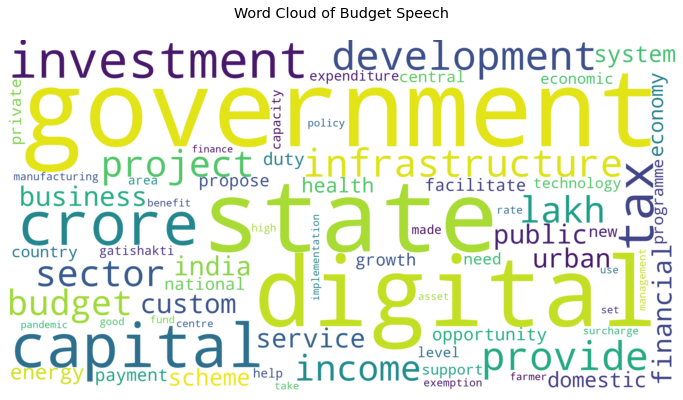

In [14]:
# Creating word_cloud with text as argument in .generate() method
text=' '.join(lst)
stopwords = STOPWORDS

# remove non relevant words
stopwords.update(('per','cent','including','year','one','provided'))

word_cloud = WordCloud(collocations=False, background_color='white',
                       max_words=70, stopwords=stopwords, min_word_length=3,
                       width=2048, height=1080).generate(text)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Budget Speech\n', size='x-large')
#plt.savefig('budget.jpg',dpi=720) # saving the image
plt.show()

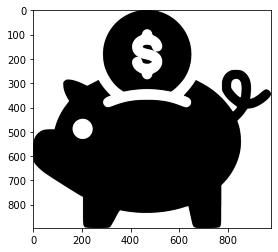

In [15]:
background_image = np.array(Image.open('/home/anandhuh/Downloads/piggi_bank.png'))
plt.imshow(background_image);

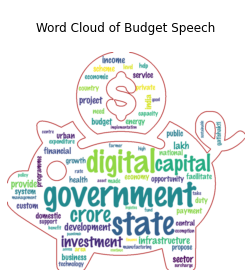

In [43]:
word_cloud2 = WordCloud(font_path='Marker Felt.ttf',collocations=False,background_color = 'white',
                        mask = background_image,stopwords=stopwords, min_word_length=4,contour_width=2, 
                        contour_color='firebrick', max_words=70,width = 2048, height = 1080).generate(text)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.title('\nWord Cloud of Budget Speech\n', size='large')
plt.savefig('budget_speech_wordcloud.jpg',dpi=1000) # saving the image
plt.show()

<ul>
    <li><h3>Sentiment Analysis</h3></li>
</ul>

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

df=pd.DataFrame()
df['sent']=lst
df["Positive"] = [SIA.polarity_scores(i)["pos"] for i in lst]
df["Neutral"] = [SIA.polarity_scores(j)["neu"] for j in lst]
df["Negative"] = [SIA.polarity_scores(k)["neg"] for k in lst]
df.head()

,sent,Positive,Neutral,Negative
0,budget 2022 2023 speech nirmala sitharaman mi...,0.041,0.881,0.079
1,overall sharp rebound recovery economy reflect...,0.292,0.708,0.000
2,india economic growth current year estimated b...,0.178,0.822,0.000
3,recognise midst omicron wave high incidence mi...,0.000,1.000,0.000
4,speed coverage vaccination campaign helped gr...,0.000,1.000,0.000


In [18]:
pos = sum(df["Positive"])
neu = sum(df["Neutral"])
neg = sum(df["Negative"])

# calculates sentiment score
def sentiment_score(pos, neu, neg):
    if (pos>neu) and (pos>neg):
        print("Positive :)")
    elif (neu>pos) and (neu>neg):
        print("Neutral :|")
    else:
        print("Negative :(")
        
sentiment_score(pos, neu, neg)

Neutral :|


In [19]:
# counting positive, neutral and negative tweets

sentiments_nltk = []

for sent in lst:
    sentiment_dict = SIA.polarity_scores(sent)
    sentiment_dict.pop('compound', None)
    sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
df['sentiment_nltk'] = sentiments_nltk
df['sentiment_nltk'].value_counts()

neu    369
pos     21
neg      2
Name: sentiment_nltk, dtype: int64